In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Set the style for the plots
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

In [17]:
# Load the data
data_path = "data/hotel_bookings.csv"
df = pd.read_csv(data_path)
df.head(-20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119365,City Hotel,0,54,2017,August,35,27,3,5,1,...,No Deposit,14.0,NaN,0,Transient,266.75,0,1,Check-Out,2017-09-04
119366,City Hotel,0,210,2017,August,35,28,2,5,2,...,No Deposit,7.0,NaN,0,Transient,85.59,0,1,Check-Out,2017-09-04
119367,City Hotel,0,212,2017,August,35,28,2,5,2,...,No Deposit,7.0,NaN,0,Transient,85.59,0,0,Check-Out,2017-09-04
119368,City Hotel,0,261,2017,August,35,30,1,4,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-04


In [3]:
# Display column names
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
# Get information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# Generate descriptive statistics
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
# Check for missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# Revenue Trend Analysis for Hotels

In [7]:
# Calculate total nights stayed
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Calculate revenue per booking
# ADR (Average Daily Rate) * total nights = total revenue per booking
df['revenue'] = df['adr'] * df['total_nights']

# Filter out canceled bookings
df_not_canceled = df[df['is_canceled'] == 0]

# Create a date column for easier time-based analysis
# Convert month names to month numbers
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df_not_canceled['month_num'] = df_not_canceled['arrival_date_month'].map(month_map)

# Create a date column (first day of each month for simplicity)
df_not_canceled['date'] = pd.to_datetime(df_not_canceled['arrival_date_year'].astype(str) + '-' + 
                                         df_not_canceled['month_num'].astype(str) + '-01')

# Display the first few rows with the new columns
df_not_canceled[['hotel', 'arrival_date_year', 'arrival_date_month', 'date', 'adr', 'total_nights', 'revenue']].head()

/tmp/ipykernel_17523/2014525736.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_canceled['month_num'] = df_not_canceled['arrival_date_month'].map(month_map)
/tmp/ipykernel_17523/2014525736.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_canceled['date'] = pd.to_datetime(df_not_canceled['arrival_date_year'].astype(str) + '-' +


,hotel,arrival_date_year,arrival_date_month,date,adr,total_nights,revenue
0,Resort Hotel,2015,July,2015-07-01,0.0,0,0.0
1,Resort Hotel,2015,July,2015-07-01,0.0,0,0.0
2,Resort Hotel,2015,July,2015-07-01,75.0,1,75.0
3,Resort Hotel,2015,July,2015-07-01,75.0,1,75.0
4,Resort Hotel,2015,July,2015-07-01,98.0,2,196.0


In [8]:
# Group by hotel and date to get monthly revenue
monthly_revenue = df_not_canceled.groupby(['hotel', 'date'])['revenue'].sum().reset_index()
monthly_revenue.head()

,hotel,date,revenue
0,City Hotel,2015-07-01,79645.69
1,City Hotel,2015-08-01,285197.49
2,City Hotel,2015-09-01,588544.97
3,City Hotel,2015-10-01,521369.65
4,City Hotel,2015-11-01,191228.34


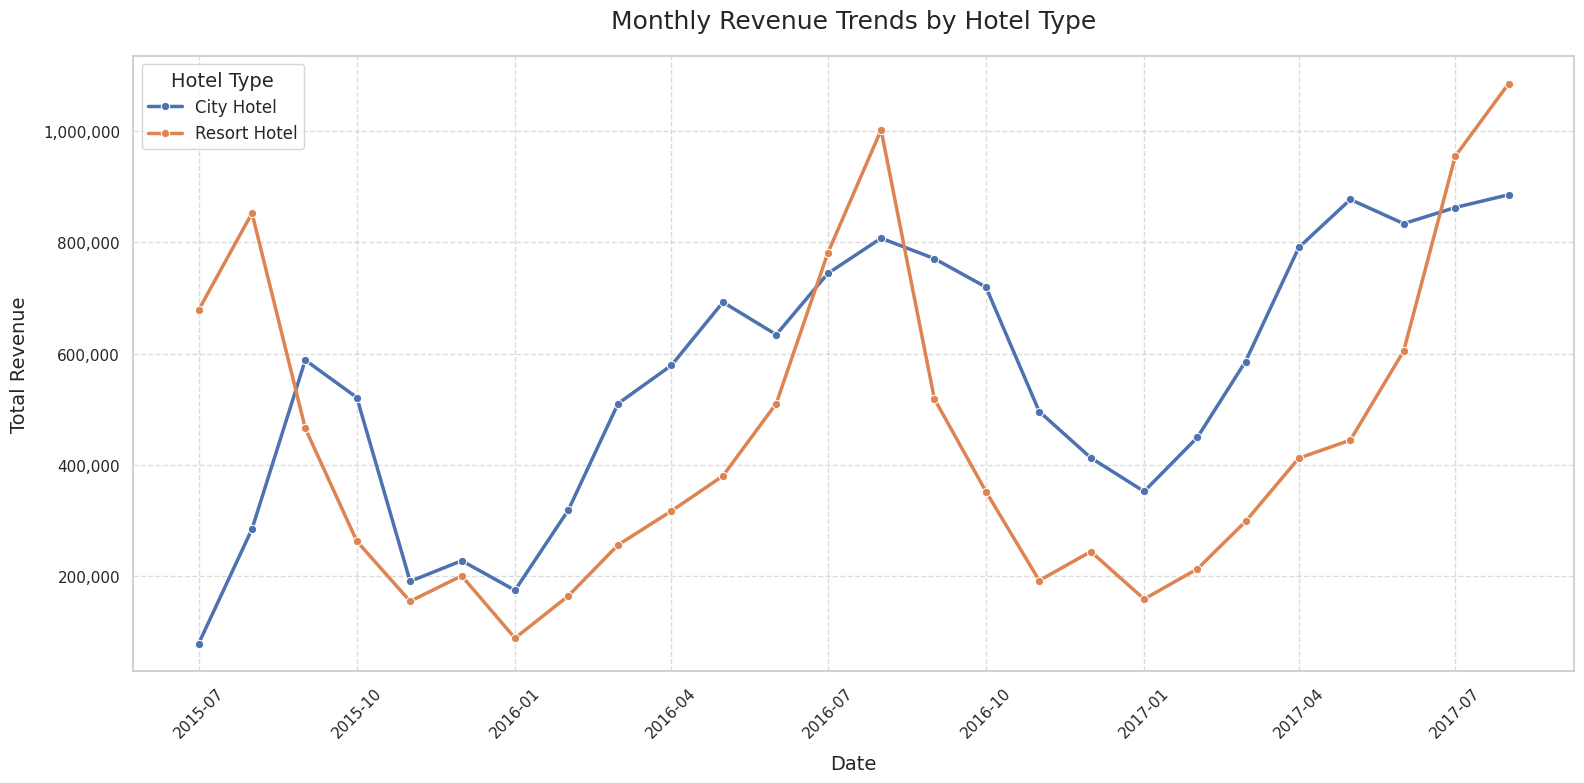

In [9]:
# Visualize monthly revenue trends by hotel type
plt.figure(figsize=(16, 8))
sns.lineplot(data=monthly_revenue, x='date', y='revenue', hue='hotel', marker='o', linewidth=2.5)

plt.title('Monthly Revenue Trends by Hotel Type', fontsize=18, pad=20)
plt.xlabel('Date', fontsize=14, labelpad=10)
plt.ylabel('Total Revenue', fontsize=14, labelpad=10)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Hotel Type', fontsize=12, title_fontsize=14)

# Format y-axis with comma separators
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

In [10]:
# Group by quarter for a higher-level view
df_not_canceled['quarter'] = df_not_canceled['date'].dt.to_period('Q')
quarterly_revenue = df_not_canceled.groupby(['hotel', 'quarter'])['revenue'].sum().reset_index()
quarterly_revenue['quarter'] = quarterly_revenue['quarter'].astype(str)
quarterly_revenue.head()

/tmp/ipykernel_17523/3084319665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_canceled['quarter'] = df_not_canceled['date'].dt.to_period('Q')


,hotel,quarter,revenue
0,City Hotel,2015Q3,953388.15
1,City Hotel,2015Q4,940935.39
2,City Hotel,2016Q1,1004898.52
3,City Hotel,2016Q2,1905922.43
4,City Hotel,2016Q3,2322345.49


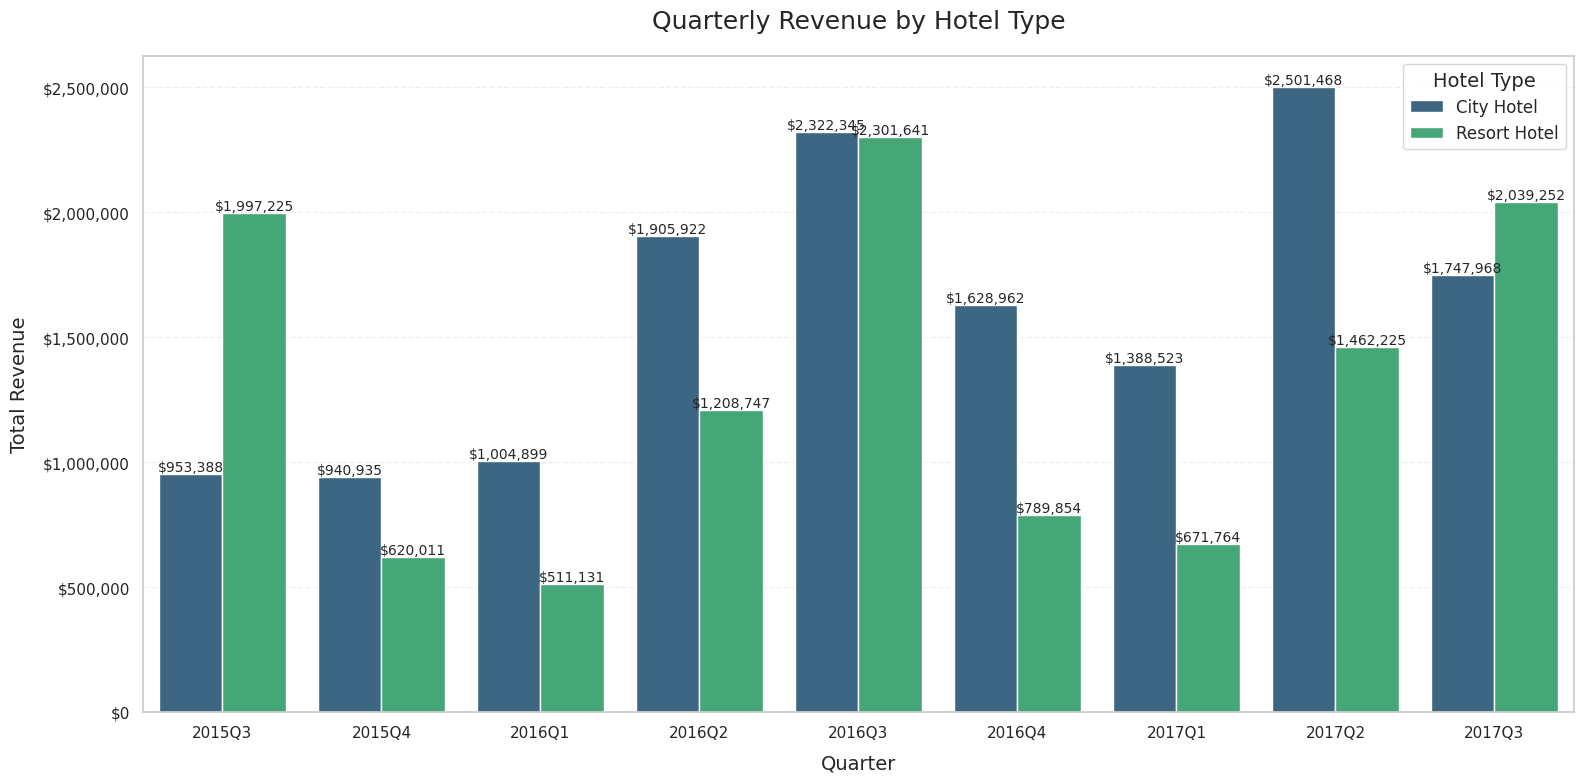

In [11]:
# Visualize quarterly revenue trends
plt.figure(figsize=(16, 8))

# Create a bar plot for quarterly revenue
ax = sns.barplot(data=quarterly_revenue, x='quarter', y='revenue', hue='hotel', palette='viridis')

plt.title('Quarterly Revenue by Hotel Type', fontsize=18, pad=20)
plt.xlabel('Quarter', fontsize=14, labelpad=10)
plt.ylabel('Total Revenue', fontsize=14, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.3, axis='y')
plt.legend(title='Hotel Type', fontsize=12, title_fontsize=14)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='${:,.0f}', fontsize=10)

# Format y-axis with comma separators
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.show()

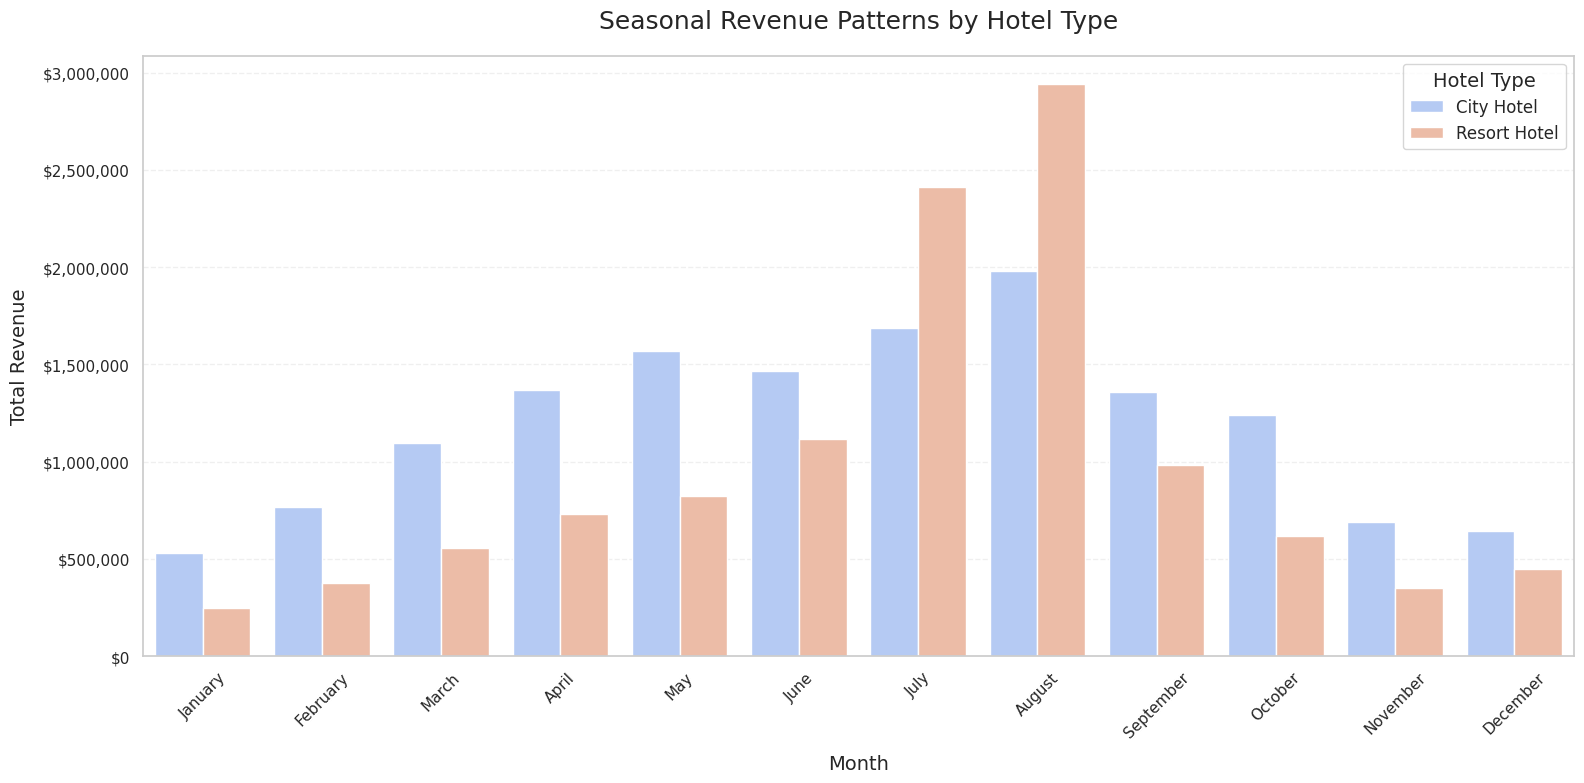

In [12]:
# Analyze revenue by month (across all years) to identify seasonal patterns
monthly_pattern = df_not_canceled.groupby(['hotel', 'arrival_date_month'])['revenue'].sum().reset_index()

# Create a custom sort order for months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_pattern['month_order'] = monthly_pattern['arrival_date_month'].map({month: i for i, month in enumerate(month_order)})
monthly_pattern = monthly_pattern.sort_values('month_order')

plt.figure(figsize=(16, 8))
sns.barplot(data=monthly_pattern, x='arrival_date_month', y='revenue', hue='hotel', palette='coolwarm', 
            order=month_order)

plt.title('Seasonal Revenue Patterns by Hotel Type', fontsize=18, pad=20)
plt.xlabel('Month', fontsize=14, labelpad=10)
plt.ylabel('Total Revenue', fontsize=14, labelpad=10)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3, axis='y')
plt.legend(title='Hotel Type', fontsize=12, title_fontsize=14)

# Format y-axis with comma separators
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.show()

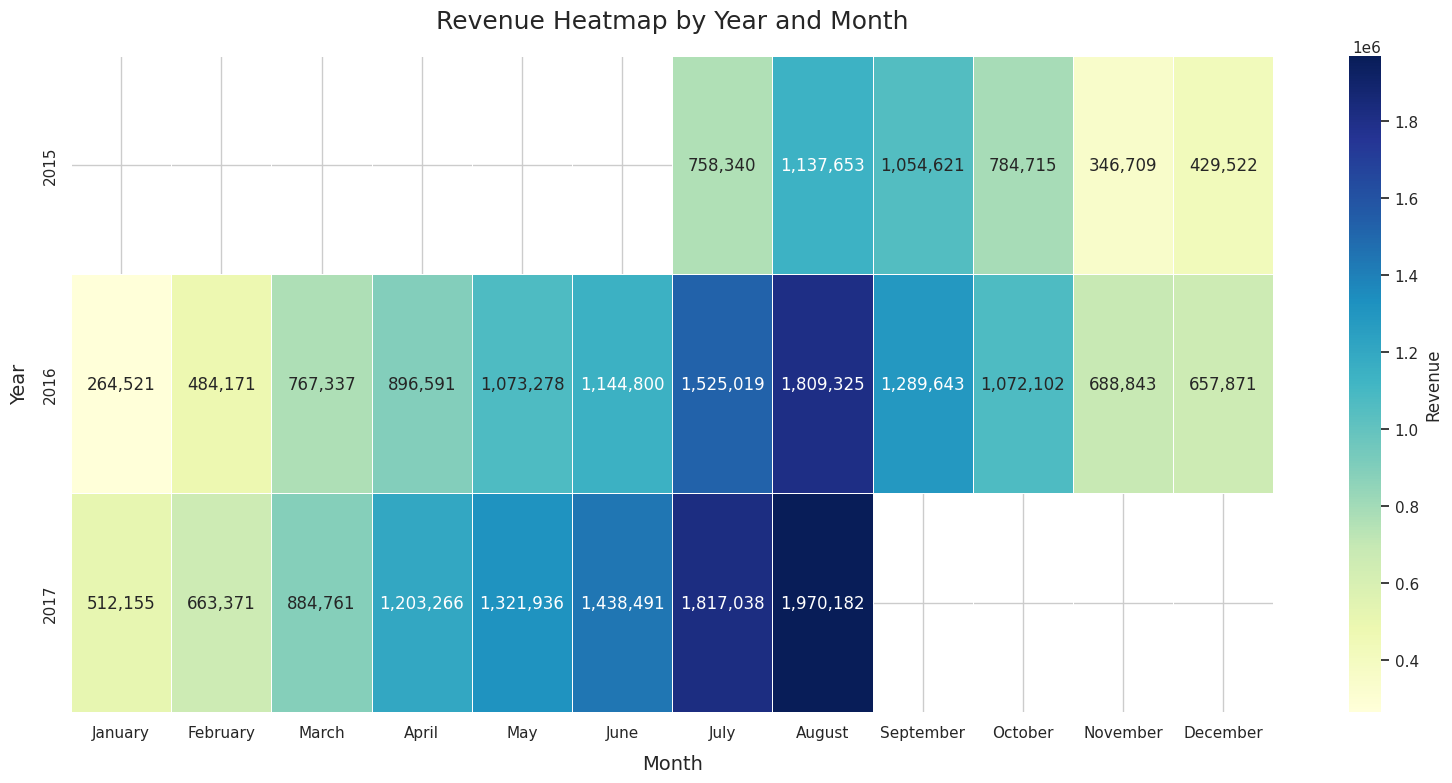

In [13]:
# Create a heatmap to visualize revenue patterns by month and year
# Pivot the data to create a matrix of years (rows) and months (columns)
pivot_data = df_not_canceled.groupby(['arrival_date_year', 'arrival_date_month'])['revenue'].sum().reset_index()
pivot_data['month_order'] = pivot_data['arrival_date_month'].map({month: i for i, month in enumerate(month_order)})
pivot_data = pivot_data.sort_values(['arrival_date_year', 'month_order'])

# Create the pivot table
heatmap_data = pivot_data.pivot(index='arrival_date_year', columns='arrival_date_month', values='revenue')
heatmap_data = heatmap_data.reindex(columns=month_order)  # Reorder columns to follow calendar months

plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, annot=True, fmt=',.0f', cmap='YlGnBu', linewidths=.5, cbar_kws={'label': 'Revenue'})

plt.title('Revenue Heatmap by Year and Month', fontsize=18, pad=20)
plt.xlabel('Month', fontsize=14, labelpad=10)
plt.ylabel('Year', fontsize=14, labelpad=10)
plt.tight_layout()
plt.show()

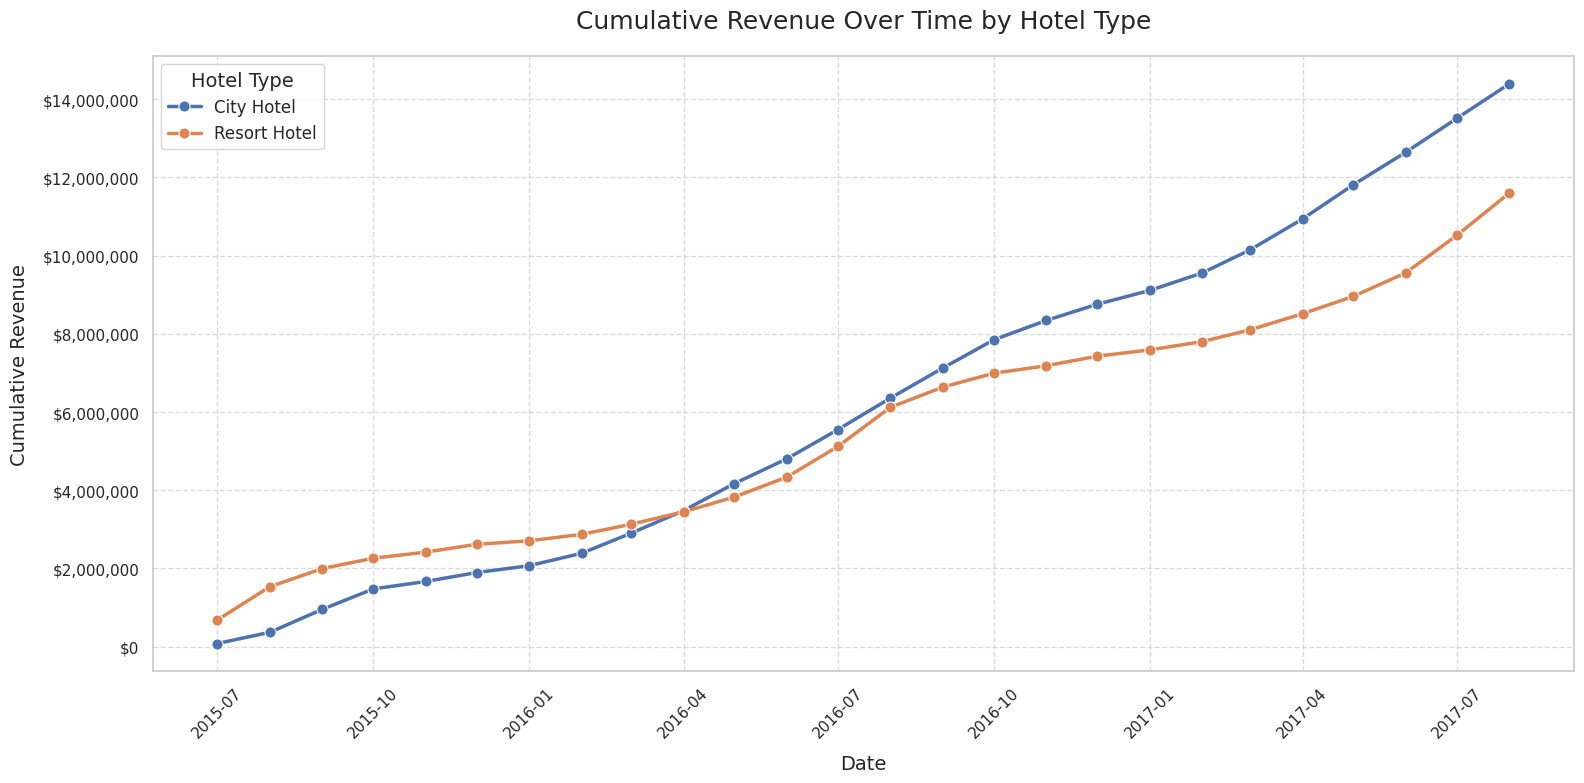

In [14]:
# Calculate cumulative revenue over time
monthly_revenue_sorted = monthly_revenue.sort_values('date')
monthly_revenue_sorted['cumulative_revenue'] = monthly_revenue_sorted.groupby('hotel')['revenue'].cumsum()

plt.figure(figsize=(16, 8))
sns.lineplot(data=monthly_revenue_sorted, x='date', y='cumulative_revenue', hue='hotel', 
             marker='o', linewidth=2.5, markersize=8)

plt.title('Cumulative Revenue Over Time by Hotel Type', fontsize=18, pad=20)
plt.xlabel('Date', fontsize=14, labelpad=10)
plt.ylabel('Cumulative Revenue', fontsize=14, labelpad=10)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Hotel Type', fontsize=12, title_fontsize=14)

# Format y-axis with comma separators
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.show()

## Revenue Analysis Summary

The visualizations above provide several insights into the revenue trends of the hotels:

1. **Monthly Revenue Trends**: Shows how revenue fluctuates month by month for each hotel type
2. **Quarterly Revenue**: Provides a higher-level view of revenue patterns by quarter
3. **Seasonal Patterns**: Identifies which months tend to generate the most revenue across all years
4. **Revenue Heatmap**: Visualizes the revenue patterns by year and month, making it easy to spot high and low periods
5. **Cumulative Revenue**: Shows the growth in total revenue over time for each hotel type

These visualizations help identify seasonal trends, compare performance between hotel types, and track overall revenue growth over time.

## Overall Cancellation Rate

In [18]:
# Set the style for the plots
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

In [19]:
total_bookings = len(df)
canceled_bookings = df['is_canceled'].sum()
cancellation_rate = (canceled_bookings / total_bookings) * 100

print(f"Total bookings: {total_bookings}")
print(f"Canceled bookings: {canceled_bookings}")
print(f"Overall cancellation rate: {cancellation_rate:.2f}%")

Total bookings: 119390
Canceled bookings: 44224
Overall cancellation rate: 37.04%


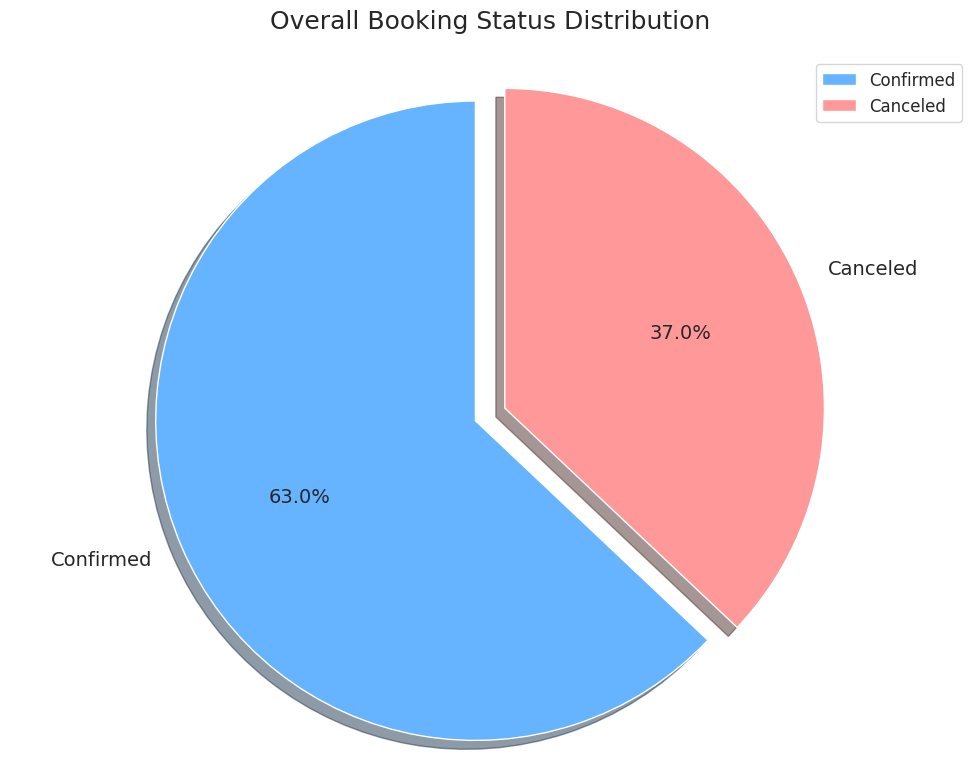

In [20]:
labels = ['Confirmed', 'Canceled']
sizes = [(total_bookings - canceled_bookings), canceled_bookings]
colors = ['#66b3ff', '#ff9999']
explode = (0, 0.1)  # explode the 2nd slice (Canceled)

plt.figure(figsize=(10, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Overall Booking Status Distribution', fontsize=18, pad=20)
plt.legend(labels, loc="best", fontsize=12)
plt.tight_layout()
plt.show()

## Cancellation Rate by Hotel Type

In [21]:
# Calculate cancellation rate by hotel type
hotel_cancellation = df.groupby('hotel').agg(
    total_bookings=('is_canceled', 'count'),
    canceled_bookings=('is_canceled', 'sum')
).reset_index()

hotel_cancellation['cancellation_rate'] = (hotel_cancellation['canceled_bookings'] / 
                                          hotel_cancellation['total_bookings']) * 100

hotel_cancellation

,hotel,total_bookings,canceled_bookings,cancellation_rate
0,City Hotel,79330,33102,41.726963
1,Resort Hotel,40060,11122,27.763355


/tmp/ipykernel_17523/1132462608.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='hotel', y='cancellation_rate', data=hotel_cancellation, palette='viridis')


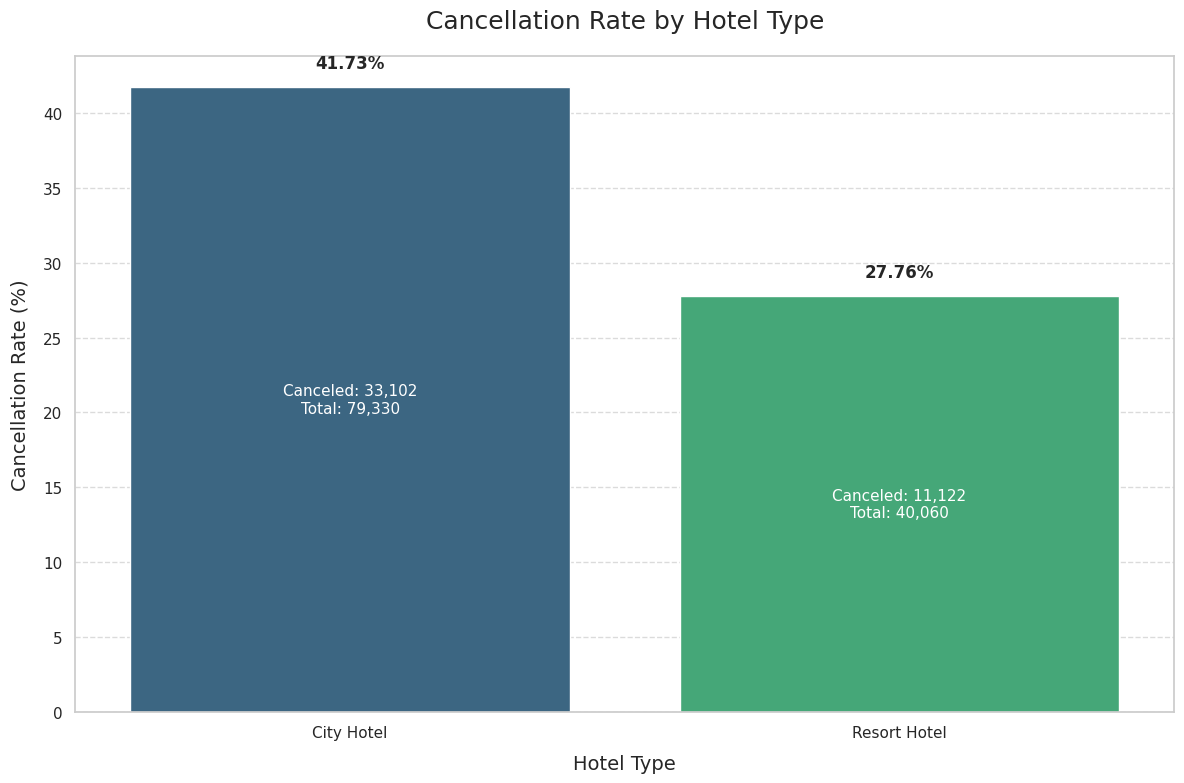

In [22]:
# Create a bar chart to visualize cancellation rate by hotel type
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='hotel', y='cancellation_rate', data=hotel_cancellation, palette='viridis')

plt.title('Cancellation Rate by Hotel Type', fontsize=18, pad=20)
plt.xlabel('Hotel Type', fontsize=14, labelpad=10)
plt.ylabel('Cancellation Rate (%)', fontsize=14, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

# Add value labels on top of bars
for i, row in enumerate(hotel_cancellation.itertuples()):
    ax.text(i, row.cancellation_rate + 1, f'{row.cancellation_rate:.2f}%', 
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add count labels inside bars
for i, row in enumerate(hotel_cancellation.itertuples()):
    ax.text(i, row.cancellation_rate / 2, 
            f'Canceled: {row.canceled_bookings:,}\nTotal: {row.total_bookings:,}', 
            ha='center', va='center', fontsize=11, color='white')

plt.tight_layout()
plt.show()

## Cancellation Rate by Month

In [23]:
# Calculate cancellation rate by month
month_cancellation = df.groupby('arrival_date_month').agg(
    total_bookings=('is_canceled', 'count'),
    canceled_bookings=('is_canceled', 'sum')
).reset_index()

month_cancellation['cancellation_rate'] = (month_cancellation['canceled_bookings'] / 
                                          month_cancellation['total_bookings']) * 100

# Create a custom sort order for months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
month_cancellation['month_order'] = month_cancellation['arrival_date_month'].map(
    {month: i for i, month in enumerate(month_order)})
month_cancellation = month_cancellation.sort_values('month_order')

month_cancellation

,arrival_date_month,total_bookings,canceled_bookings,cancellation_rate,month_order
4,January,5929,1807,30.477315,0
3,February,8068,2696,33.415964,1
7,March,9794,3149,32.152338,2
0,April,11089,4524,40.797186,3
8,May,11791,4677,39.665847,4
6,June,10939,4535,41.457172,5
5,July,12661,4742,37.453598,6
1,August,13877,5239,37.753117,7
11,September,10508,4116,39.170156,8
10,October,11160,4246,38.046595,9


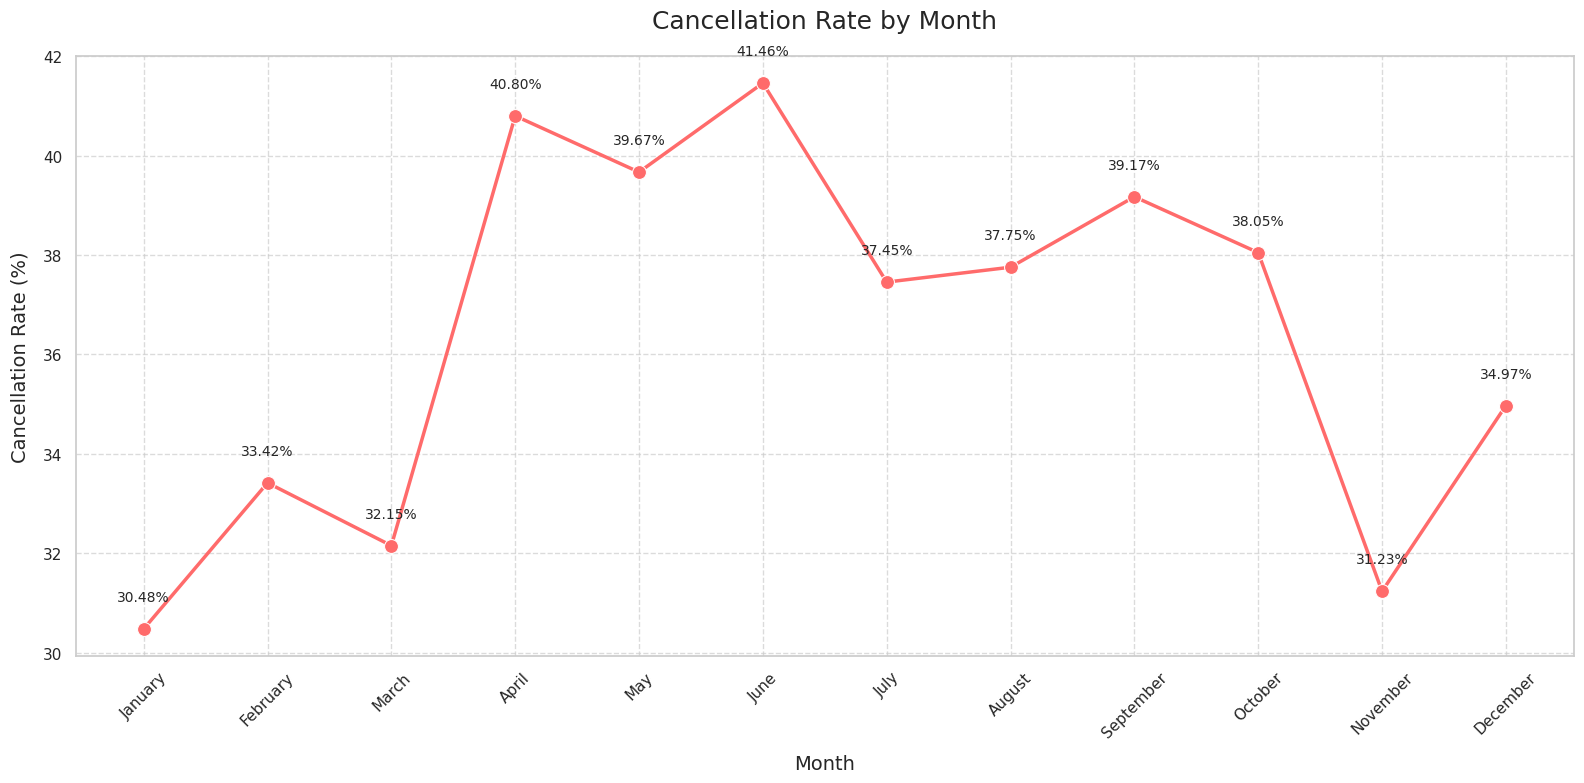

In [24]:
# Create a line chart to visualize cancellation rate by month
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x='arrival_date_month', y='cancellation_rate', data=month_cancellation, 
                 marker='o', linewidth=2.5, markersize=10, color='#ff6b6b', sort=False)

plt.title('Cancellation Rate by Month', fontsize=18, pad=20)
plt.xlabel('Month', fontsize=14, labelpad=10)
plt.ylabel('Cancellation Rate (%)', fontsize=14, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add value labels above points
for i, row in enumerate(month_cancellation.itertuples()):
    ax.text(i, row.cancellation_rate + 0.5, f'{row.cancellation_rate:.2f}%', 
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## Cancellation Rate by Hotel Type and Month

In [25]:
# Calculate cancellation rate by hotel type and month
hotel_month_cancellation = df.groupby(['hotel', 'arrival_date_month']).agg(
    total_bookings=('is_canceled', 'count'),
    canceled_bookings=('is_canceled', 'sum')
).reset_index()

hotel_month_cancellation['cancellation_rate'] = (hotel_month_cancellation['canceled_bookings'] / 
                                               hotel_month_cancellation['total_bookings']) * 100

# Add month order for sorting
hotel_month_cancellation['month_order'] = hotel_month_cancellation['arrival_date_month'].map(
    {month: i for i, month in enumerate(month_order)})
hotel_month_cancellation = hotel_month_cancellation.sort_values(['hotel', 'month_order'])

hotel_month_cancellation.head()

,hotel,arrival_date_month,total_bookings,canceled_bookings,cancellation_rate,month_order
4,City Hotel,January,3736,1482,39.668094,0
3,City Hotel,February,4965,1901,38.288016,1
7,City Hotel,March,6458,2386,36.946423,2
0,City Hotel,April,7480,3465,46.323529,3
8,City Hotel,May,8232,3653,44.375607,4


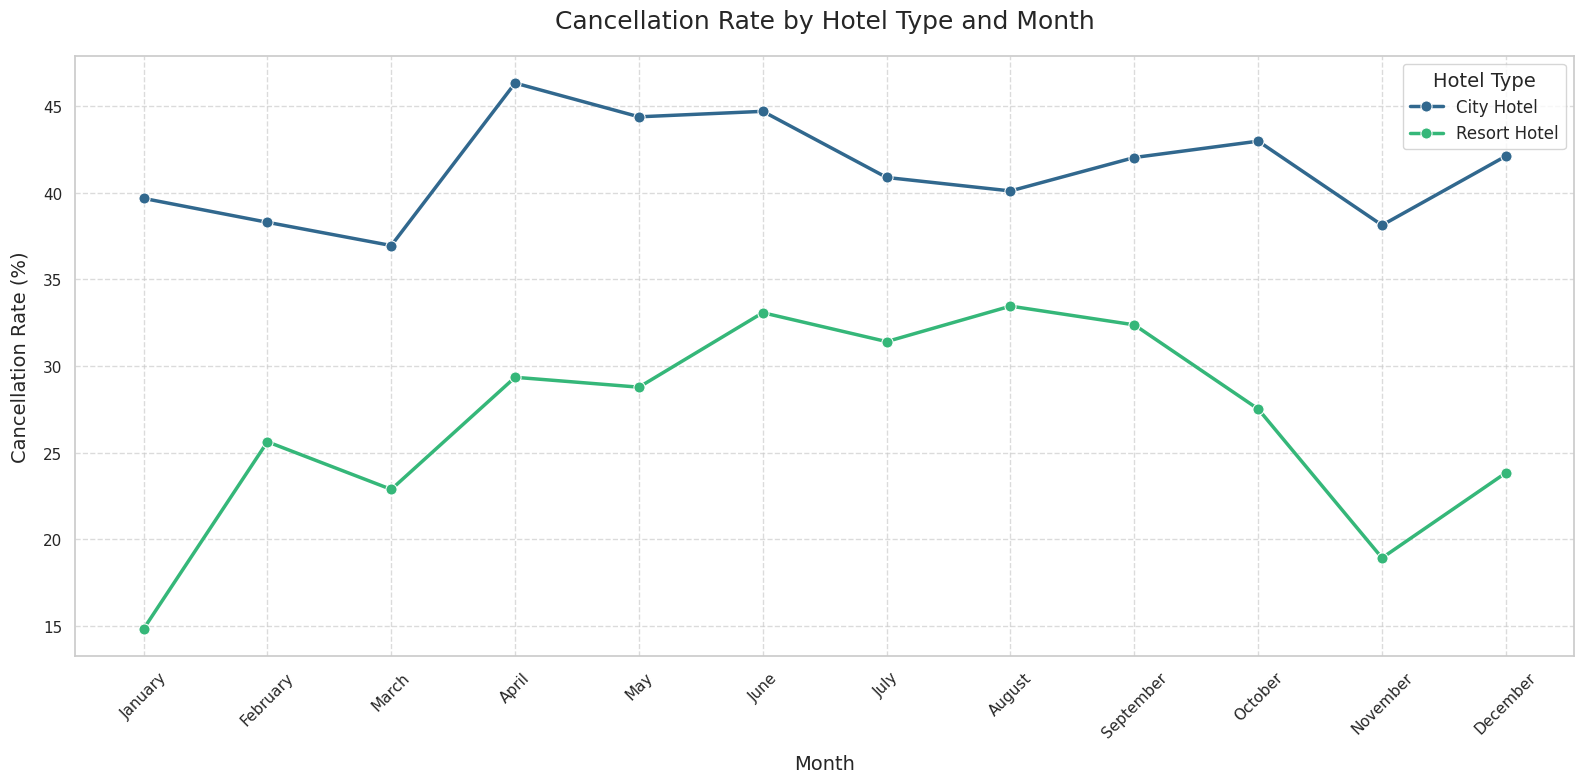

In [26]:
# Create a line chart to visualize cancellation rate by hotel type and month
plt.figure(figsize=(16, 8))
sns.lineplot(x='arrival_date_month', y='cancellation_rate', hue='hotel', 
             data=hotel_month_cancellation, marker='o', linewidth=2.5, markersize=8,
             palette='viridis', sort=False)

plt.title('Cancellation Rate by Hotel Type and Month', fontsize=18, pad=20)
plt.xlabel('Month', fontsize=14, labelpad=10)
plt.ylabel('Cancellation Rate (%)', fontsize=14, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title='Hotel Type', fontsize=12, title_fontsize=14)

plt.tight_layout()
plt.show()

## Cancellation Rate by Year

In [27]:
# Calculate cancellation rate by year
year_cancellation = df.groupby('arrival_date_year').agg(
    total_bookings=('is_canceled', 'count'),
    canceled_bookings=('is_canceled', 'sum')
).reset_index()

year_cancellation['cancellation_rate'] = (year_cancellation['canceled_bookings'] / 
                                         year_cancellation['total_bookings']) * 100

year_cancellation

,arrival_date_year,total_bookings,canceled_bookings,cancellation_rate
0,2015,21996,8142,37.015821
1,2016,56707,20337,35.863297
2,2017,40687,15745,38.697864


/tmp/ipykernel_17523/94520194.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='arrival_date_year', y='cancellation_rate', data=year_cancellation, palette='Blues_d')


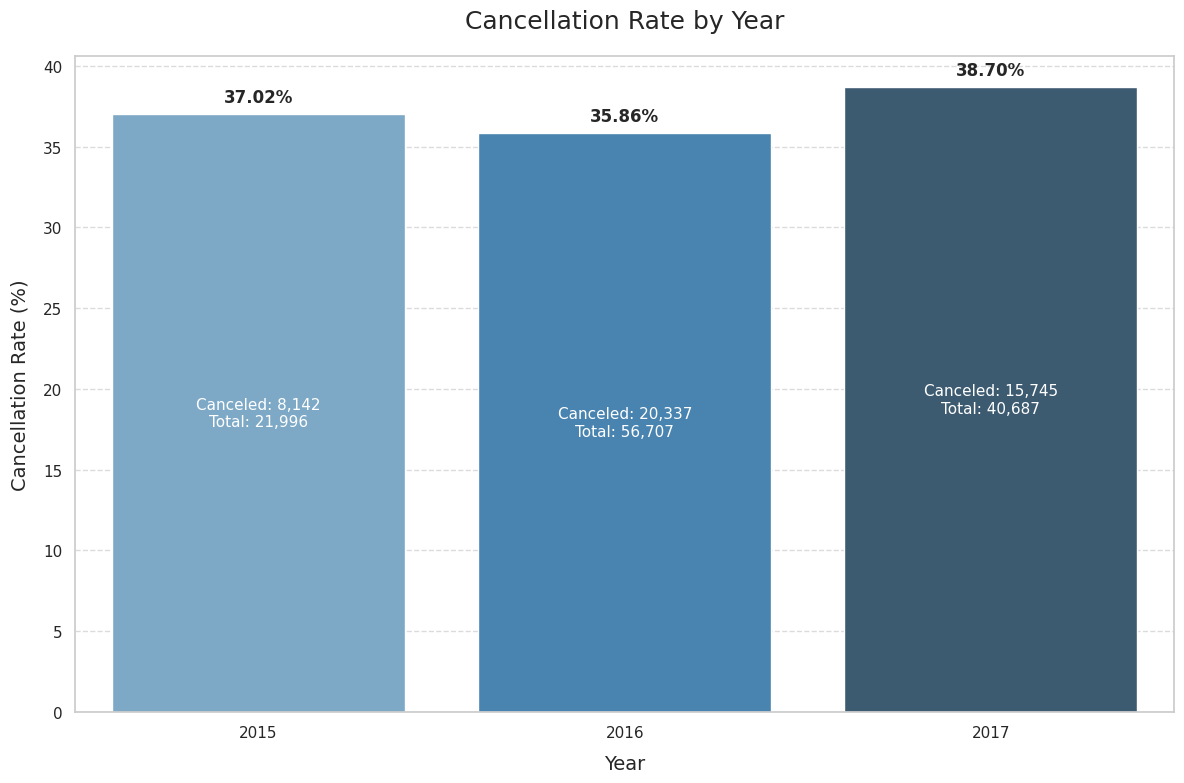

In [28]:
# Create a bar chart to visualize cancellation rate by year
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='arrival_date_year', y='cancellation_rate', data=year_cancellation, palette='Blues_d')

plt.title('Cancellation Rate by Year', fontsize=18, pad=20)
plt.xlabel('Year', fontsize=14, labelpad=10)
plt.ylabel('Cancellation Rate (%)', fontsize=14, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

# Add value labels on top of bars
for i, row in enumerate(year_cancellation.itertuples()):
    ax.text(i, row.cancellation_rate + 0.5, f'{row.cancellation_rate:.2f}%', 
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add count labels inside bars
for i, row in enumerate(year_cancellation.itertuples()):
    ax.text(i, row.cancellation_rate / 2, 
            f'Canceled: {row.canceled_bookings:,}\nTotal: {row.total_bookings:,}', 
            ha='center', va='center', fontsize=11, color='white')

plt.tight_layout()
plt.show()

## Cancellation Rate by Hotel Type and Year


In [29]:
# Calculate cancellation rate by hotel type and year
hotel_year_cancellation = df.groupby(['hotel', 'arrival_date_year']).agg(
    total_bookings=('is_canceled', 'count'),
    canceled_bookings=('is_canceled', 'sum')
).reset_index()

hotel_year_cancellation['cancellation_rate'] = (hotel_year_cancellation['canceled_bookings'] / 
                                              hotel_year_cancellation['total_bookings']) * 100

hotel_year_cancellation

,hotel,arrival_date_year,total_bookings,canceled_bookings,cancellation_rate
0,City Hotel,2015,13682,6004,43.882473
1,City Hotel,2016,38140,15407,40.395910
2,City Hotel,2017,27508,11691,42.500364
3,Resort Hotel,2015,8314,2138,25.715660
4,Resort Hotel,2016,18567,4930,26.552486
5,Resort Hotel,2017,13179,4054,30.761059


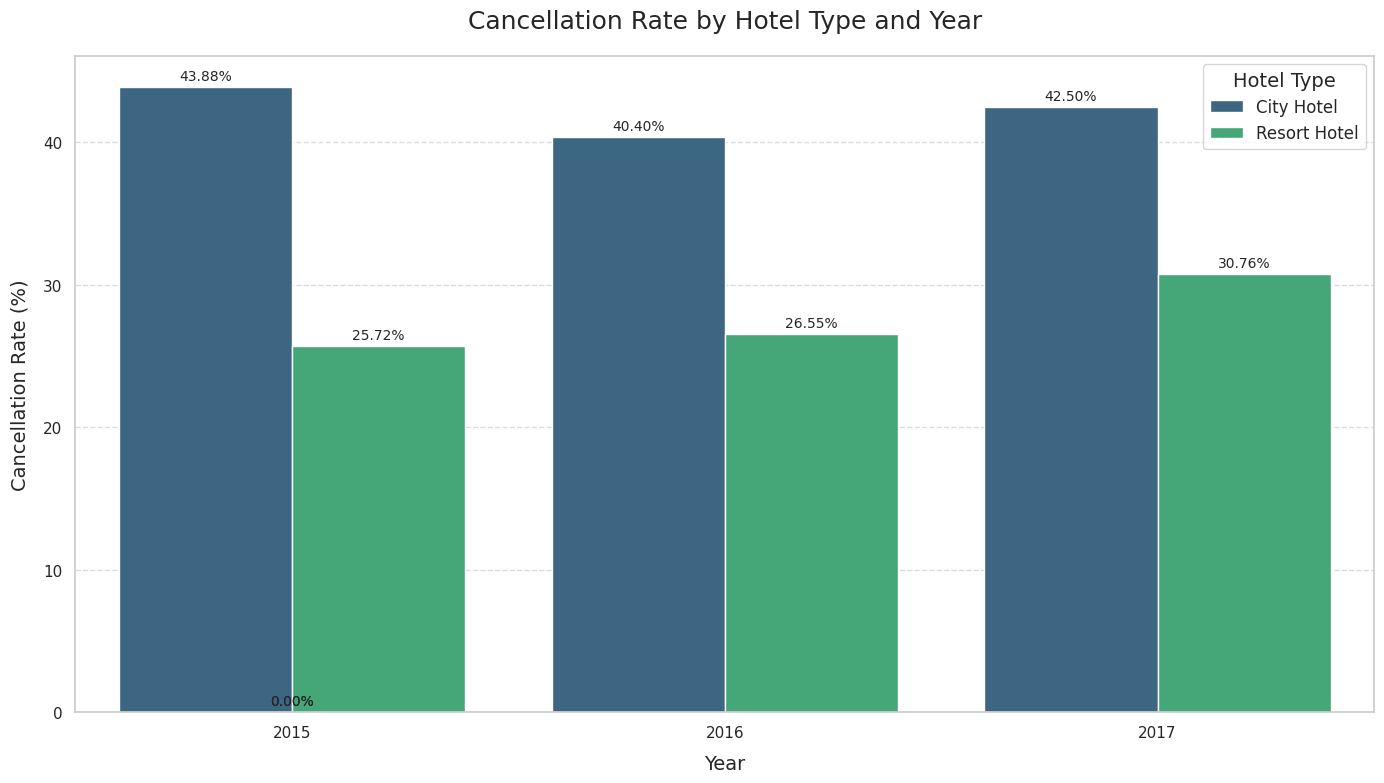

In [30]:
# Create a grouped bar chart to visualize cancellation rate by hotel type and year
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='arrival_date_year', y='cancellation_rate', hue='hotel', 
                data=hotel_year_cancellation, palette='viridis')

plt.title('Cancellation Rate by Hotel Type and Year', fontsize=18, pad=20)
plt.xlabel('Year', fontsize=14, labelpad=10)
plt.ylabel('Cancellation Rate (%)', fontsize=14, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.legend(title='Hotel Type', fontsize=12, title_fontsize=14)

# Add value labels on top of bars
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5,
            f'{height:.2f}%', ha="center", fontsize=10)

plt.tight_layout()
plt.show()

## Cancellation Rate by Lead Time


In [31]:
# Create lead time categories
def categorize_lead_time(lead_time):
    if lead_time <= 7:
        return '0-7 days'
    elif lead_time <= 30:
        return '8-30 days'
    elif lead_time <= 90:
        return '31-90 days'
    elif lead_time <= 180:
        return '91-180 days'
    else:
        return '180+ days'

df['lead_time_category'] = df['lead_time'].apply(categorize_lead_time)

# Define the order of categories
lead_time_order = ['0-7 days', '8-30 days', '31-90 days', '91-180 days', '180+ days']

# Calculate cancellation rate by lead time category
lead_time_cancellation = df.groupby('lead_time_category').agg(
    total_bookings=('is_canceled', 'count'),
    canceled_bookings=('is_canceled', 'sum')
).reset_index()

lead_time_cancellation['cancellation_rate'] = (lead_time_cancellation['canceled_bookings'] / 
                                              lead_time_cancellation['total_bookings']) * 100

# Reorder categories
lead_time_cancellation['category_order'] = lead_time_cancellation['lead_time_category'].map(
    {cat: i for i, cat in enumerate(lead_time_order)})
lead_time_cancellation = lead_time_cancellation.sort_values('category_order')

lead_time_cancellation

,lead_time_category,total_bookings,canceled_bookings,cancellation_rate,category_order
0,0-7 days,19746,1902,9.632331,0
3,8-30 days,18960,5283,27.863924,1
2,31-90 days,29553,11141,37.698372,2
4,91-180 days,26439,11821,44.710466,3
1,180+ days,24692,14077,57.010368,4


/tmp/ipykernel_17523/1452843975.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='lead_time_category', y='cancellation_rate', data=lead_time_cancellation,


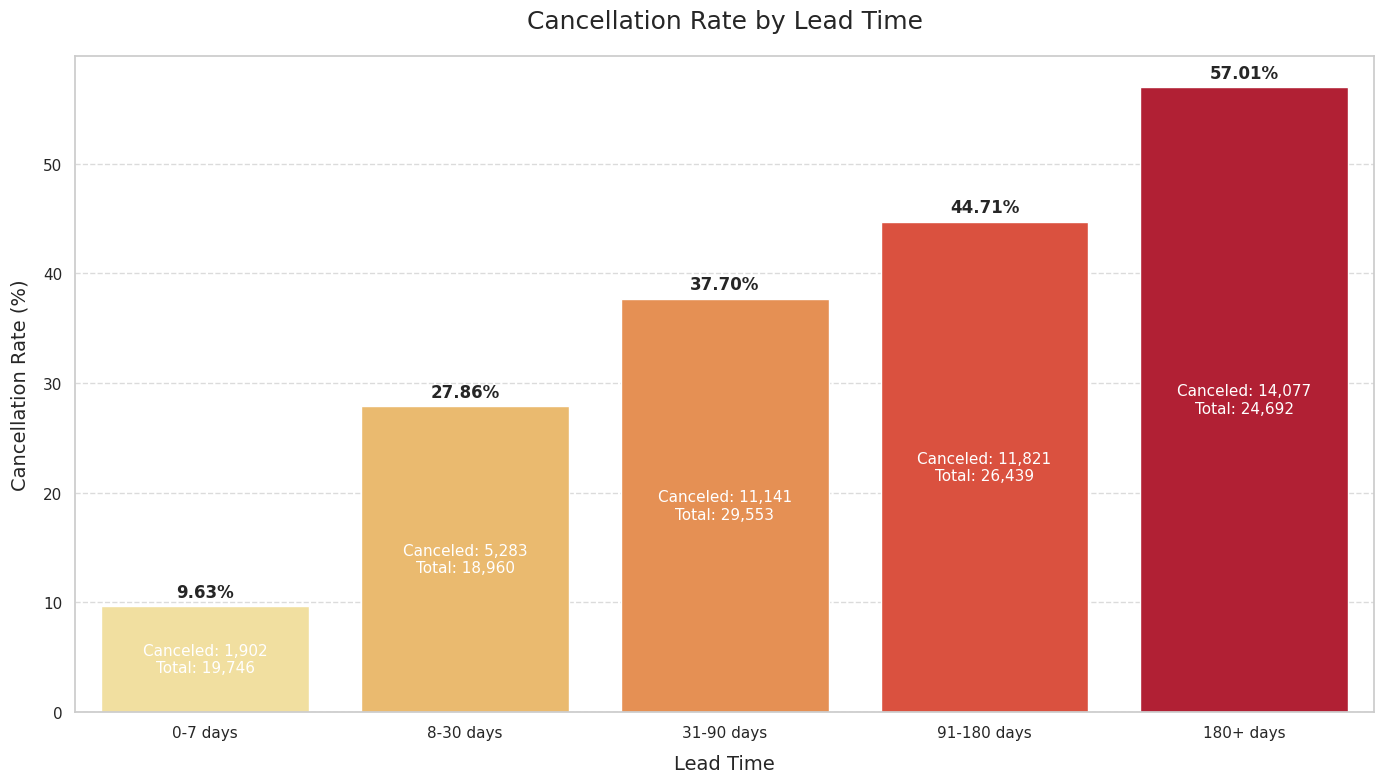

In [32]:
# Create a bar chart to visualize cancellation rate by lead time category
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='lead_time_category', y='cancellation_rate', data=lead_time_cancellation, 
                palette='YlOrRd', order=lead_time_order)

plt.title('Cancellation Rate by Lead Time', fontsize=18, pad=20)
plt.xlabel('Lead Time', fontsize=14, labelpad=10)
plt.ylabel('Cancellation Rate (%)', fontsize=14, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

# Add value labels on top of bars
for i, row in enumerate(lead_time_cancellation.itertuples()):
    ax.text(i, row.cancellation_rate + 0.5, f'{row.cancellation_rate:.2f}%', 
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add count labels inside bars
for i, row in enumerate(lead_time_cancellation.itertuples()):
    ax.text(i, row.cancellation_rate / 2, 
            f'Canceled: {row.canceled_bookings:,}\nTotal: {row.total_bookings:,}', 
            ha='center', va='center', fontsize=11, color='white')

plt.tight_layout()
plt.show()

## Summary of Cancellation Analysis

The visualizations above provide several insights into the cancellation patterns of hotel bookings:

1. **Overall Cancellation Rate**: Shows the percentage of all bookings that were canceled
2. **Cancellation by Hotel Type**: Compares cancellation rates between different hotel types
3. **Seasonal Patterns**: Identifies which months have higher or lower cancellation rates
4. **Yearly Trends**: Shows how cancellation rates have changed over the years
5. **Lead Time Impact**: Demonstrates the relationship between booking lead time and cancellation probability

These visualizations help identify patterns and factors that influence cancellation rates, which can be valuable for revenue management and operational planning.

## Country wise Booking

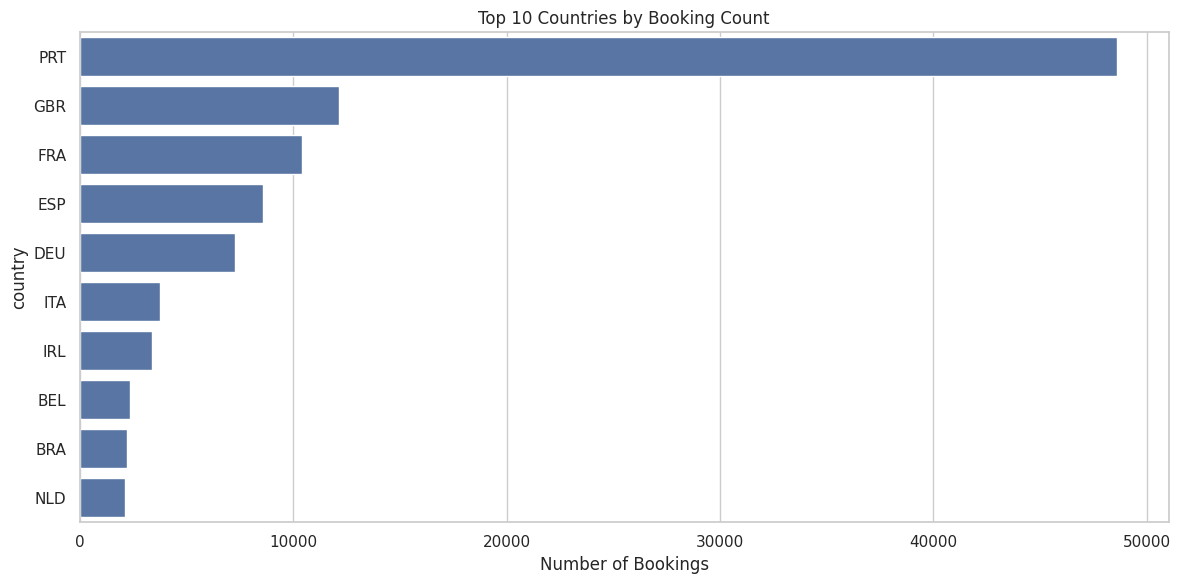


Geographical Distribution Statistics:
Total number of unique countries: 177

Top 5 countries by booking count:
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: count, dtype: int64


In [34]:
# Create a bar plot of top 10 countries
plt.figure(figsize=(12, 6))
country_counts = df['country'].value_counts().head(10)
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Top 10 Countries by Booking Count')
plt.xlabel('Number of Bookings')
plt.tight_layout()
plt.show()

# Print statistics
print("\nGeographical Distribution Statistics:")
print(f"Total number of unique countries: {df['country'].nunique()}")
print("\nTop 5 countries by booking count:")
print(df['country'].value_counts().head())

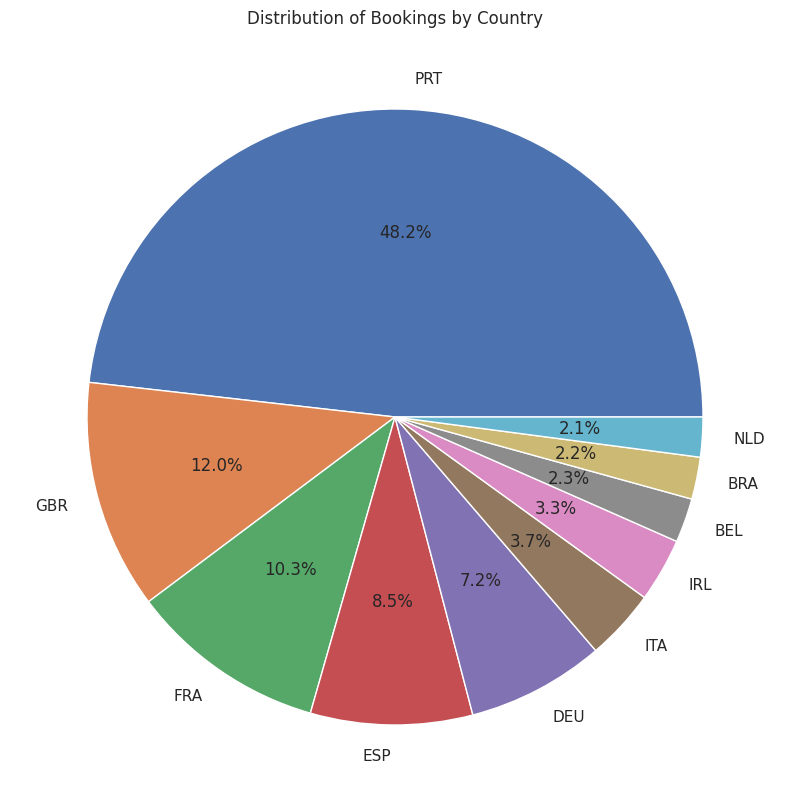

In [35]:
# Create a pie chart for the top 10 countries
plt.figure(figsize=(10, 10))
plt.pie(country_counts.values, labels=country_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Bookings by Country')
plt.show()

## Distribution of Booking Lead Time

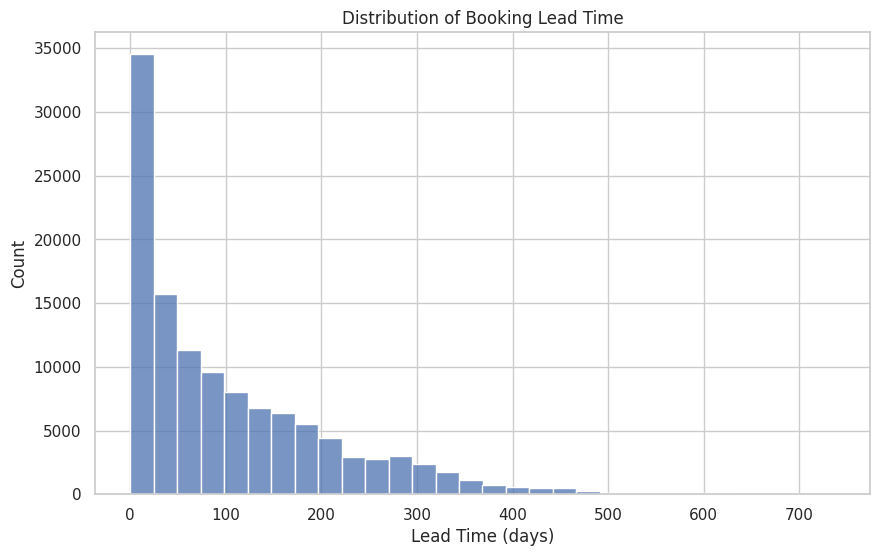

In [36]:
# Create a simple histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='lead_time', bins=30)
plt.title('Distribution of Booking Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Count')
plt.show()

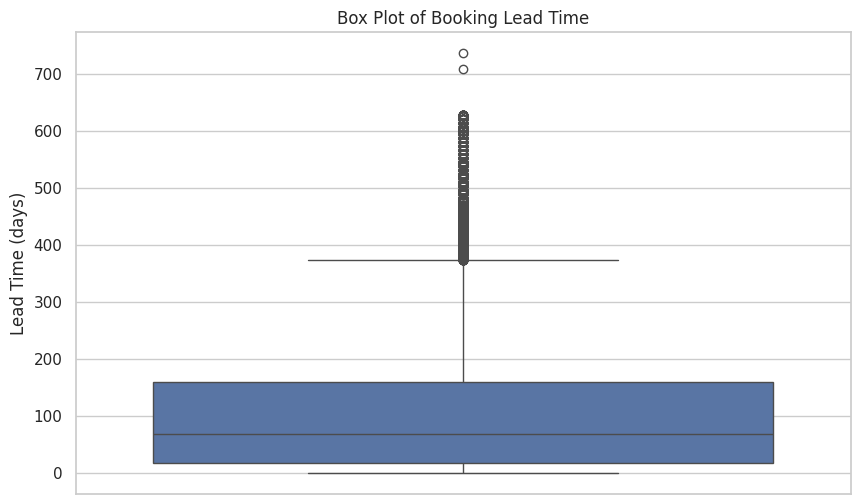

In [37]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y='lead_time', data=df)
plt.title('Box Plot of Booking Lead Time')
plt.ylabel('Lead Time (days)')
plt.show()

In [38]:
# Display statistics
print("Lead Time Statistics:")
print(df['lead_time'].describe())

Lead Time Statistics:
count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64


In [40]:

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Read the data
df = pd.read_csv('data/hotel_bookings.csv')

# Create arrival date column
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + 
                                  df['arrival_date_month'] + '-' + 
                                  df['arrival_date_day_of_month'].astype(str))

# Calculate length of stay
df['length_of_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

## Customer Satisfaction Analysis:

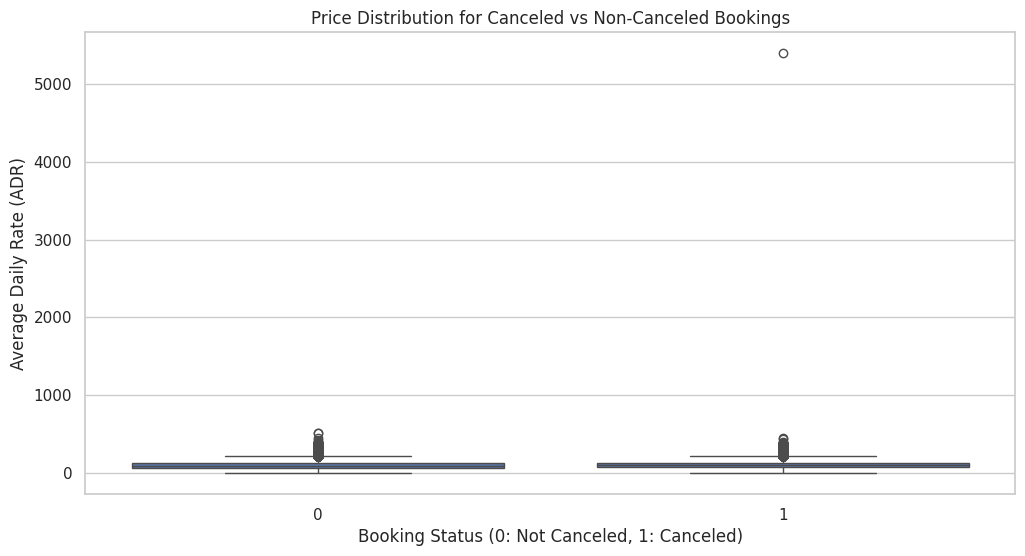

/tmp/ipykernel_17523/436371840.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_by_price = df.groupby('price_quartile')['is_canceled'].mean() * 100



Cancellation Rates by Price Quartile:
price_quartile
Low            33.428189
Medium-Low     36.915339
Medium-High    39.172757
High           38.641036
Name: is_canceled, dtype: float64


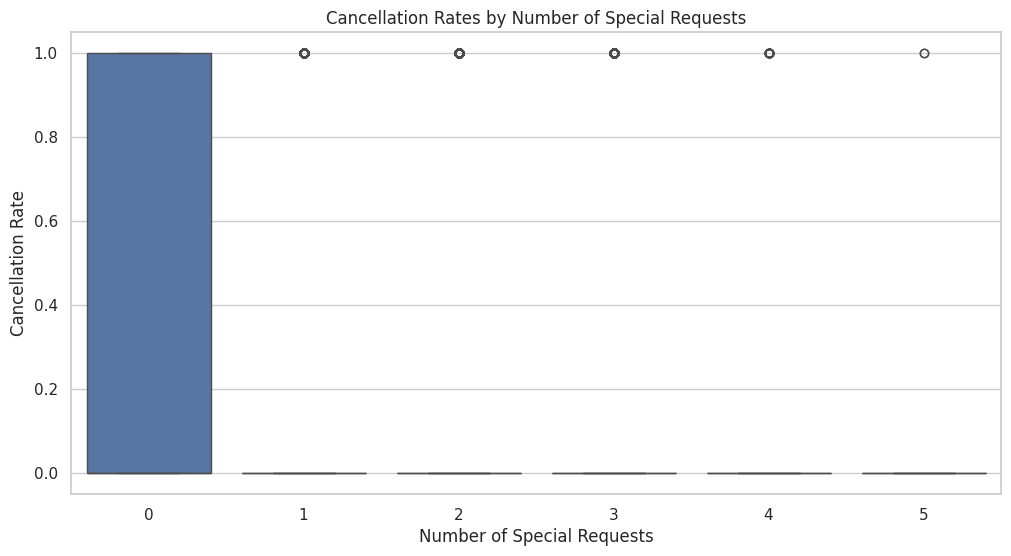


Correlation between special requests and cancellation: -0.235


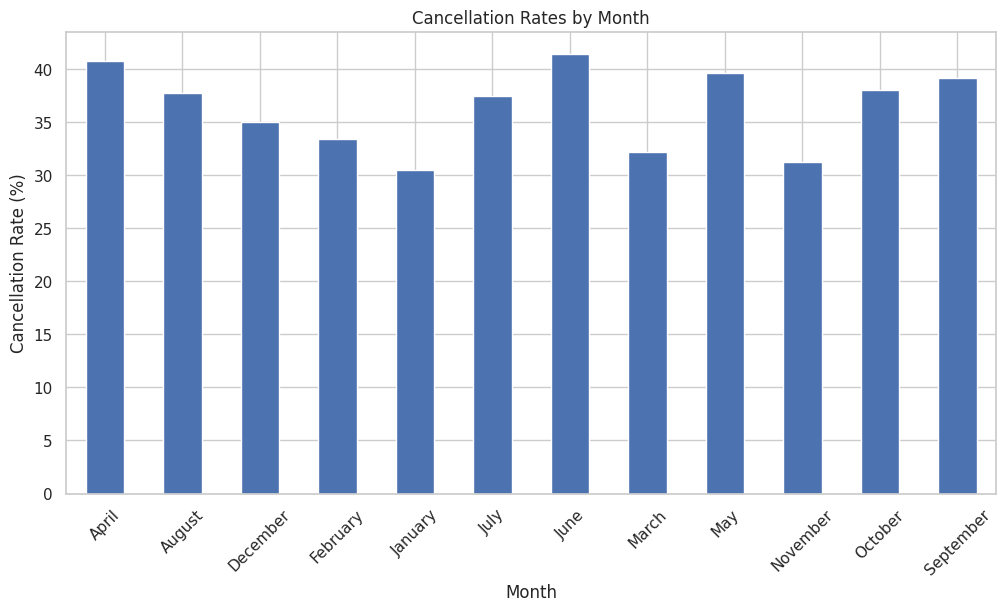

In [41]:
# 1. Price vs Satisfaction Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='is_canceled', y='adr')
plt.title('Price Distribution for Canceled vs Non-Canceled Bookings')
plt.xlabel('Booking Status (0: Not Canceled, 1: Canceled)')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

# Calculate cancellation rates by price quartile
df['price_quartile'] = pd.qcut(df['adr'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
cancellation_by_price = df.groupby('price_quartile')['is_canceled'].mean() * 100

print("\nCancellation Rates by Price Quartile:")
print(cancellation_by_price)

# 2. Special Requests vs Satisfaction
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='total_of_special_requests', y='is_canceled')
plt.title('Cancellation Rates by Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Cancellation Rate')
plt.show()

# Calculate correlation between special requests and cancellation
correlation = df['total_of_special_requests'].corr(df['is_canceled'])
print(f"\nCorrelation between special requests and cancellation: {correlation:.3f}")

# 3. Seasonal Satisfaction Patterns
monthly_cancellation = df.groupby('arrival_date_month')['is_canceled'].mean() * 100

plt.figure(figsize=(12, 6))
monthly_cancellation.plot(kind='bar')
plt.title('Cancellation Rates by Month')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45)
plt.show()

## Operational Efficiency Analysis:

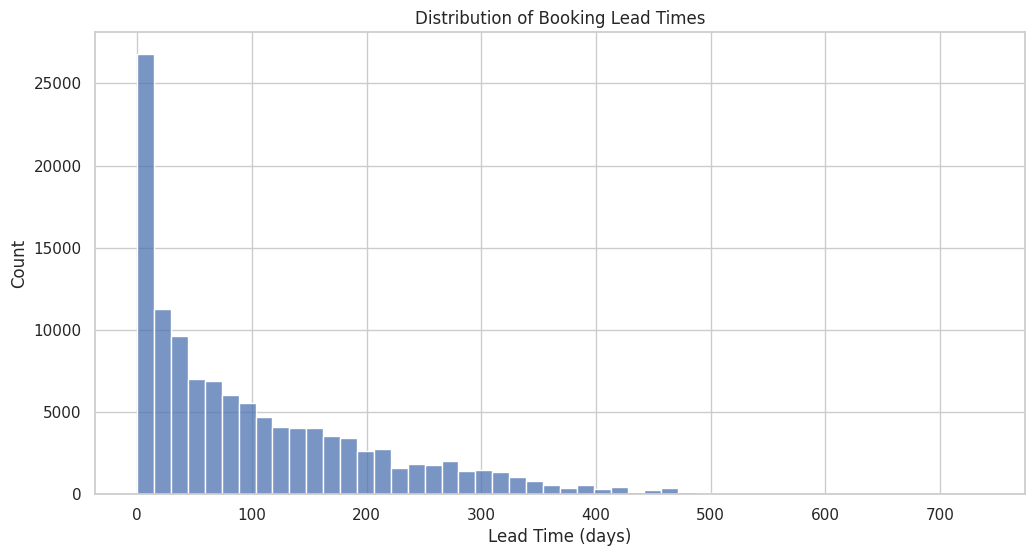


Cancellation Rates by Lead Time Quintile:
lead_time
(-0.001, 11.0]    11.657673
(11.0, 45.0]      32.101455
(45.0, 99.0]      39.454158
(99.0, 184.0]     44.983306
(184.0, 737.0]    57.261970
Name: is_canceled, dtype: float64


/tmp/ipykernel_17523/4038546275.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_by_lead_time = df.groupby(pd.qcut(df['lead_time'], q=5))['is_canceled'].mean() * 100


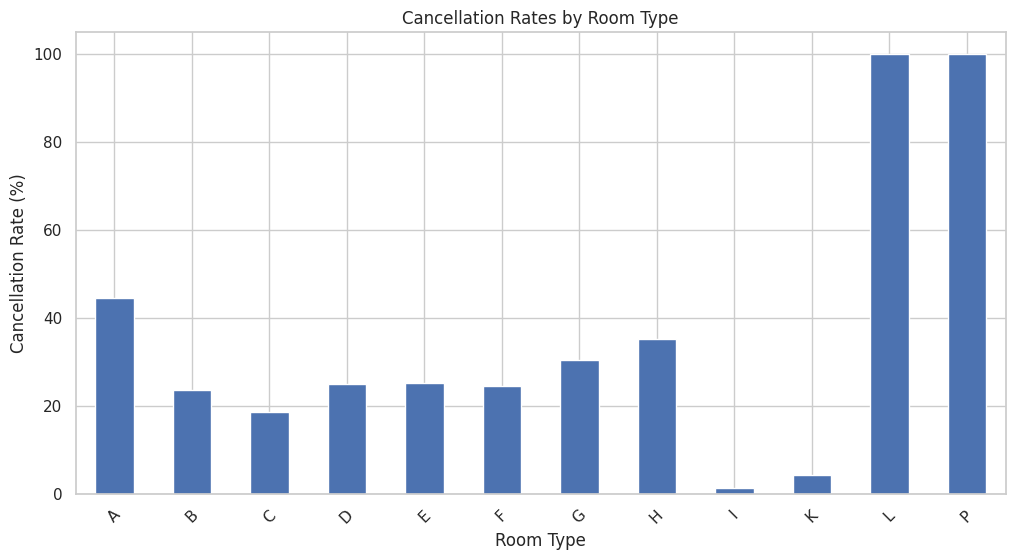


Room Type Distribution:
assigned_room_type
A    62.026133
B     1.811710
C     1.989279
D    21.209482
E     6.538236
F     3.141804
G     2.138370
H     0.596365
I     0.304046
K     0.233688
L     0.000838
P     0.010051
dtype: float64

Channel Performance Metrics:


,is_canceled,adr,lead_time,cancellation_rate
distribution_channel,,,,
Corporate,0.22,69.33,44.91,22.0
Direct,0.17,106.65,57.83,17.0
GDS,0.19,120.55,20.72,19.0
TA/TO,0.41,103.29,115.12,41.0
Undefined,0.80,46.24,23.00,80.0


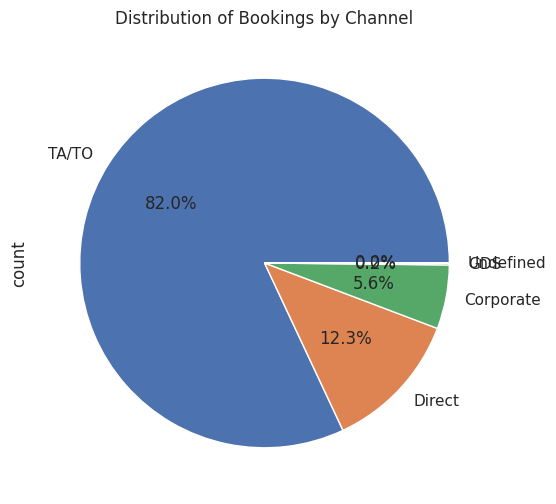

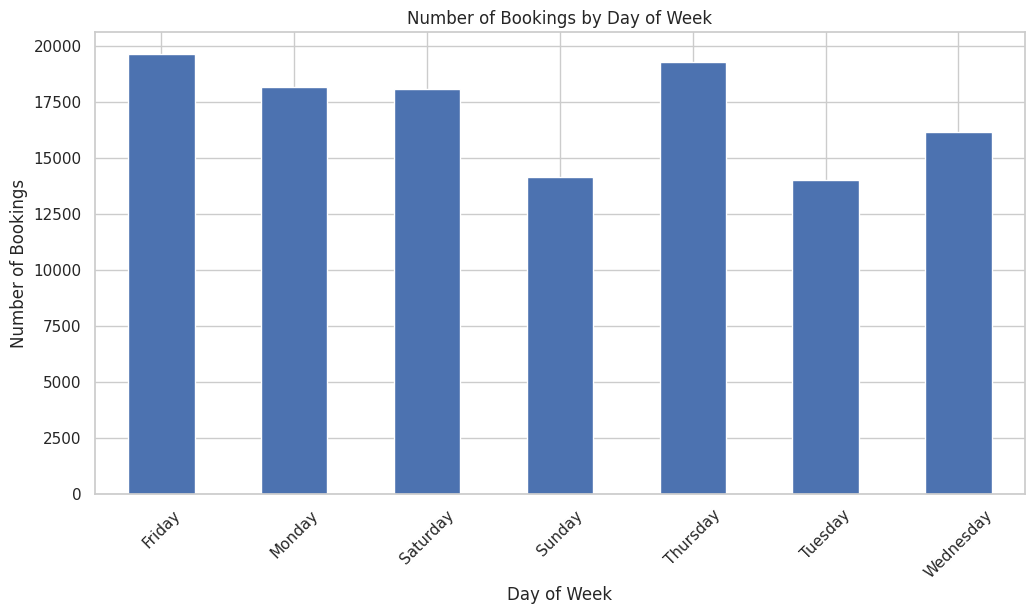


Average Bookings by Day of Week:
arrival_day
Friday       19631
Monday       18171
Saturday     18055
Sunday       14141
Thursday     19254
Tuesday      13999
Wednesday    16139
dtype: int64


In [42]:
# 1. Booking Lead Time Optimization
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='lead_time', bins=50)
plt.title('Distribution of Booking Lead Times')
plt.xlabel('Lead Time (days)')
plt.ylabel('Count')
plt.show()

# Calculate optimal booking window
cancellation_by_lead_time = df.groupby(pd.qcut(df['lead_time'], q=5))['is_canceled'].mean() * 100

print("\nCancellation Rates by Lead Time Quintile:")
print(cancellation_by_lead_time)

# 2. Resource Allocation Optimization
# Analyze room type distribution and cancellation rates
room_cancellation = df.groupby('assigned_room_type')['is_canceled'].mean() * 100

plt.figure(figsize=(12, 6))
room_cancellation.plot(kind='bar')
plt.title('Cancellation Rates by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Calculate average occupancy by room type
room_occupancy = df.groupby('assigned_room_type').size() / len(df) * 100

print("\nRoom Type Distribution:")
print(room_occupancy)

# 3. Channel Mix Optimization
# Analyze booking channels and their performance
channel_metrics = df.groupby('distribution_channel').agg({
    'is_canceled': 'mean',
    'adr': 'mean',
    'lead_time': 'mean'
}).round(2)

channel_metrics['cancellation_rate'] = channel_metrics['is_canceled'] * 100

print("\nChannel Performance Metrics:")
display(channel_metrics)

# Visualize channel distribution
plt.figure(figsize=(10, 6))
df['distribution_channel'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Bookings by Channel')
plt.show()

# 4. Staffing Level Optimization
# Analyze booking patterns by day of week
df['arrival_day'] = pd.to_datetime(df['arrival_date']).dt.day_name()
daily_bookings = df.groupby('arrival_day').size()

plt.figure(figsize=(12, 6))
daily_bookings.plot(kind='bar')
plt.title('Number of Bookings by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

# Calculate average bookings per day
print("\nAverage Bookings by Day of Week:")
print(daily_bookings)